# 2d shapping

This notebook allow to test the algorithme used to shape 2d data into regular grid

In [1]:
%matplotlib widget

import numpy as np
from typing import Tuple
import sys
sys.path.append('../')
from sources.qcodesdatabase import QcodesDatabase
import matplotlib.pyplot as plt

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\ed261978\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\ed261978\.qcodes\logs\200917-15660-qcodes.log


In [2]:
def shapeData2d(x: np.ndarray,
                y: np.ndarray,
                z: np.ndarray) -> Tuple[np.ndarray]:
    """
    Shape the data for a 2d plot but mainly handled all kind of data error/missing/...

    Return x and y as a 1d array, ready to be used for the 2d plot
    and z as a 2d array.
    In case of non regular grid, the y axis is approximated.
    """


    # Nb points in the 1st dimension
    xn = len(np.unique(x))

    # Nb points in the 2nd dimension
    xx = np.array([])
    for i in np.unique(x):
        xx = np.append(xx, len(x[x==i]))
    yn = int(xx.max())

    # If interuption, we calculated the number of missing point and add them
    if len(np.unique(xx)) != 1:

        p = np.full(int(xx.max() - xx.min()), np.nan)

        x = np.append(x, p)
        y = np.append(y, p)
        z = np.append(z, p)

    # We create 2D arrays for each dimension
    x = x.reshape(xn, yn)
    y = y.reshape(xn, yn)
    z = z.reshape(xn, yn)

    # Once the shape is corrected, we sort the data
    m = x[:,0].argsort()
    x = x[m]
    y = y[m]
    z = z[m]

    # If the data has a rectangular shape (usual 2d measurement)
    if len(np.unique(y[:,0])) == 1:

        # Take a slice of x
        xx = x[:,0]

        # Find a row of y containing only non nan data
        i = 0
        for i in y:
            if not np.any(np.isnan(i)):
                yy = i
                break
            i+=1

        zz = z
    else:
        
        xx = x[:,0]

        # Create a bigger array containing sorted data in the same bases
        # New y axis containing all the previous y axes
        yd = np.gradient(np.sort(y[0])).min()
        yy = np.arange(y[~np.isnan(y)].min(), y[~np.isnan(y)].max()+yd, yd)

        # fit the z value to the new grid
        zz = np.full((len(xx), len(yy)), np.nan)
        for x_index in range(len(x)):
            for y_index in range(len(y.T)):
                zz[x_index,np.abs(yy-y[x_index, y_index]).argmin()] = z[x_index,y_index]



    # If there is only one point in x or y, we artificialy create more
    moreThanOneColumn = True
    if len(xx)==1:
        xx = np.array([xx[0]-0.1, xx[0]+0.1])
        moreThanOneColumn = False
    if len(yy)==1:
        yy = np.array([yy[0]-0.1, yy[0]+0.1])
        moreThanOneColumn = False
        
    # If there is more than one column, we center the colored rectangles
    if moreThanOneColumn:

        dx = np.gradient(xx)/2.
        xx = np.linspace(xx[0]-dx[0], xx[-1]+dx[-1], len(xx))

        dy = np.gradient(yy)/2.
        yy = np.linspace(yy[0]-dy[0], yy[-1]+dy[-1], len(yy))



    return xx, yy, zz

# evenly spaced grid data

In [15]:
a = r"S:\132-PHELIQS\132.05-LATEQS\132.05.01-QuantumSilicon\edumur_test.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(3, 'magnitude')

x = d['vna_power']
y = d['vna_TR1_frequency']
z = d['magnitude']
x, y, z

(array([-60, -60, -60, ...,  10,  10,  10]),
 array([ 2000000000,  2000400000,  2000800000, ...,  9999200000,
         9999600000, 10000000000], dtype=int64),
 array([-38.53633192, -45.65287397, -38.32315887, ..., -63.67493398,
        -63.63133383, -63.67992073]))

In [3]:
a = r"S:/132-PHELIQS/132.05-LATEQS/132.05.01-QuantumSilicon/bluelagoon/2020/20200904_20200226_NbN01_E1/data/power_dependence_5p1GHz.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(7, 'vna_TR1_Magnitude')

x = d['vna_power']
y = d['vna_TR1_frequency']
z = d['vna_TR1_Magnitude']
x, y, z

(array([-35, -35, -35, ..., -75, -75, -75]),
 array([5090900000, 5090900500, 5090901000, ..., 5100899000, 5100899500,
        5100900000], dtype=int64),
 array([-16.67678201, -16.67479765, -16.68723657, ..., -17.47195087,
        -18.09944519, -17.28735826]))

In [11]:
print(x.shape, y.shape, z.shape)
print(np.unique(x).shape, np.unique(y).shape, z.shape)

(180009,) (180009,) (180009,)
(9,) (20001,) (180009,)


In [12]:
np.unique(x)

array([-75, -70, -65, -60, -55, -50, -45, -40, -35])

In [5]:
xx, yy, zz = shapeData2d(x, y, z)

xx.shape, yy.shape, zz.shape, zz.shape[0]*zz.shape[1]

((9,), (20001,), (9, 20001), 180009)

In [9]:
xx

array([-77.5  , -71.875, -66.25 , -60.625, -55.   , -49.375, -43.75 ,
       -38.125, -32.5  ])

In [10]:
np.gradient(xx)

array([5.625, 5.625, 5.625, 5.625, 5.625, 5.625, 5.625, 5.625, 5.625])

In [8]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

# ax.pcolormesh(x2dVertices, y2dVertices, z2d)
c = ax.imshow(zz.T,
            extent=[xx[0], xx[-1], yy[0], yy[-1]],
            origin='bottom',
            aspect='auto',
            alpha=0.5,
          vmin = zz.min(),
          vmax = zz.max(),
          cmap=plt.cm.viridis,
         zorder=1000)

cb = fig.colorbar(c)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Missing point evenly spaced grid data

In [4]:
a = r"S:/132-PHELIQS/132.05-LATEQS/132.05.01-QuantumSilicon/experiments.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(80, 'lockin_R')

x = d['Vsd']
y = d['G1']
z = d['lockin_R']
x, y, z

(array([-100,  -99,  -98, ...,  -59,  -58,  -57]),
 array([-1.185, -1.185, -1.185, ..., -1.192, -1.192, -1.192]),
 array([0.08514, 0.0567 , 0.03226, ..., 0.05355, 0.05439, 0.05708]))

In [5]:
x.shape, y.shape, z.shape

((2858,), (2858,), (2858,))

## Unregular finished grid

In [6]:
a = r"S:/132-PHELIQS/132.05-LATEQS/edumur/scripts/plotter/test_folder/livePlot.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(62, 'dmm_v1')

x = d['dac_ch1']
y = d['dac_ch2']
z = d['dmm_v1']
x, y, z

(array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25, 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 25.  ,
        25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  ,
        25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  ,
        25.  ]),
 array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
         21.05263158,  26.31578947,  31.57894737,  36.84210526,
         42.10526316,  47.36842105,  52.63157895,  57.89473684,
         6

## Unfinished unregular grid

In [3]:
a = r"S:/132-PHELIQS/132.05-LATEQS/edumur/scripts/plotter/test_folder/livePlot.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(67, 'dmm_v1')

x = d['dac_ch1']
y = d['dac_ch2']
z = d['dmm_v1']
x, y, z

(array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25, 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 25.  ,
        25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  , 25.  ,
        25.  , 25.  , 25.  , 25.  ]),
 array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
         21.05263158,  26.31578947,  31.57894737,  36.84210526,
         42.10526316,  47.36842105,  52.63157895,  57.89473684,
         63.15789474,  68.42105263,  73.68421053,  78.947368

# Unregular holed finihsed

In [51]:
a = r"S:/132-PHELIQS/132.05-LATEQS/132.05.01-QuantumSilicon/experiments - Copy.db"
q = QcodesDatabase()
q.databasePath = a
d = q.getParameterData(47, 'magnitude')

x = d['vna2_power']
y = d['vna2_TR1_frequency']
z = d['magnitude']
x, y, z

(array([-60, -60, -60, ..., -40, -40, -40]),
 array([2821100000, 2821200000, 2821300000, ..., 5762300000, 5762400000,
        5762500000], dtype=int64),
 array([ 9.74970169,  8.25705337,  6.30737528, ..., 32.20708525,
        32.2276225 , 32.24054072]))

# Find effective x column

In [8]:
if y[1]==y[0]:
    t = x
    x = y
    y = t

## Get nb point in each axis

In [9]:
len(np.unique([len(x[x==i])for i in np.unique(x)]))==1

False

In [10]:
# Nb points in the 1st dimension
xn = len(np.unique(x))

# Nb points in the 2nd dimension

yn = len(x[x==x[0]])
xn, yn, int(len(x)/xn)

# [i for i in x[::int(len(x)/xn)]], x   

y[0]!=y[len(x[x==x[0]])]


True

In [11]:
# Find how many element a finished grid would have
# Number of element per x value
t = np.array([len(x[x==i])for i in np.unique(x)])
tmax = max(t)
# Number of element if the measurement was finished
t_finished = (len(t[t==min(t)]) + len(t[t==tmax]))*tmax
# Number of missing element
nb_missing = t_finished - len(x)
# Last full y measured
yLastFull = y[-2*tmax+nb_missing:-tmax+nb_missing]
dyLastFull = np.gradient(yLastFull)
dyinterp = np.gradient(yLastFull)[-nb_missing:]

yMissing = np.array([y[-1]])
for i in dyinterp:
    yMissing = np.append(yMissing, yMissing[-1] + i)
    
y_new = np.concatenate((y, yMissing[1:]))


t, t_finished, nb_missing, t_finished-nb_missing, yLastFull, np.concatenate((x, [x[-1]]*nb_missing)), y_new





(array([20, 20, 20, 20, 14]),
 100,
 6,
 94,
 array([ 18.75      ,  24.01315789,  29.27631579,  34.53947368,
         39.80263158,  45.06578947,  50.32894737,  55.59210526,
         60.85526316,  66.11842105,  71.38157895,  76.64473684,
         81.90789474,  87.17105263,  92.43421053,  97.69736842,
        102.96052632, 108.22368421, 113.48684211, 118.75      ]),
 array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,  6.25,
         6.25,  6.25,  6.25,  6.25, 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 ,
        12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 12.5 , 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75,
        18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 2

In [12]:
# Finished regular grid
if len(np.unique([len(x[x==i])for i in np.unique(x)]))==1 and len(np.unique(y))==len(y[::len(np.unique(x))]):
    print('Finished regular grid')
    
    # Nb points in the 1st dimension
    xn = len(np.unique(x))

    # Nb points in the 2nd dimension
    yn = len(y[::xn])# Finished regular grid
    
# Finished unregular grid
elif len(np.unique([len(x[x==i])for i in np.unique(x)]))==1 :
    print('Finished unregular grid')
    
    # Nb points in the 1st dimension
    xn = len(np.unique(x))

    # Nb points in the 2nd dimension
    yn = len(y[::xn])

# Unfinished unregular grid
elif y[0]!=y[len(x[x==x[0]])]:
    print('Unfinished unregular grid')
    
    # Nb points in the 1st dimension
    xn = len(np.unique(x))
    
    # Nb points in the 2nd dimension
    yn = len(x[x==x[0]])
    
    ## Build "full" x, y and z
    
    # Find how many element a finished grid would have
    # Number of element per x value
    t = np.array([len(x[x==i])for i in np.unique(x)])
    tmax = max(t)
    # Number of element if the measurement was finished
    t_finished = (len(t[t==min(t)]) + len(t[t==tmax]))*tmax
    # Number of missing element
    nb_missing = t_finished - len(x)
    
    ## Interpolate last y value based on the last done scan
    # Last full y measured
    yLastFull = y[-2*tmax+nb_missing:-tmax+nb_missing]
    dyLastFull = np.gradient(yLastFull)
    dyinterp = np.gradient(yLastFull)[-nb_missing:]

    yMissing = np.array([y[-1]])
    for i in dyinterp:
        yMissing = np.append(yMissing, yMissing[-1] + i)


    x = np.concatenate((x, [x[-1]]*nb_missing))
    y = np.concatenate((y, yMissing[1:]))
    z = np.concatenate((z, [np.nan]*nb_missing))

    
# Unfinished regular grid
else:
    print('Unfinished regular grid')
    
    ## Build "full" x, y and z
    
    # Find how many element a finished grid would have
    # Number of element per x value
    t = np.array([len(x[x==i])for i in np.unique(x)])
    # Number of element if the measurement was finished
    t_finished = (len(t[t==min(t)]) + len(t[t==max(t)]))*max(t)
    # Number of missing element
    nb_missing = t_finished - len(x)
    
    # Nb points in the 1st dimension
    xn = len(np.unique(x))
    # Nb points in the 2nd dimension
    yn = len(np.unique(y))
    
    x = np.concatenate((x, [x[-1]]*nb_missing))
    
    
    y = np.concatenate((y, y[:yn][-nb_missing:]))
    z = np.concatenate((z, [np.nan]*nb_missing))
    

xn, yn, xn*yn, x.shape, y.shape, z.shape

Unfinished unregular grid


(5, 20, 100, (100,), (100,), (100,))

## Get x

In [14]:
x2d = x.reshape((xn, yn))
dx = np.gradient(x2d, axis=0)/2.

x2dVertices = np.concatenate((x2d - dx, [x2d[-1]+dx[-1]]))
x2dVertices = np.concatenate((x2dVertices, np.array([x2dVertices[:,1]]).T), axis=1)
x2dVertices.shape, x2dVertices

((6, 21),
 array([[-3.125, -3.125, -3.125, -3.125, -3.125, -3.125, -3.125, -3.125,
         -3.125, -3.125, -3.125, -3.125, -3.125, -3.125, -3.125, -3.125,
         -3.125, -3.125, -3.125, -3.125, -3.125],
        [ 3.125,  3.125,  3.125,  3.125,  3.125,  3.125,  3.125,  3.125,
          3.125,  3.125,  3.125,  3.125,  3.125,  3.125,  3.125,  3.125,
          3.125,  3.125,  3.125,  3.125,  3.125],
        [ 9.375,  9.375,  9.375,  9.375,  9.375,  9.375,  9.375,  9.375,
          9.375,  9.375,  9.375,  9.375,  9.375,  9.375,  9.375,  9.375,
          9.375,  9.375,  9.375,  9.375,  9.375],
        [15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625,
         15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625,
         15.625, 15.625, 15.625, 15.625, 15.625],
        [21.875, 21.875, 21.875, 21.875, 21.875, 21.875, 21.875, 21.875,
         21.875, 21.875, 21.875, 21.875, 21.875, 21.875, 21.875, 21.875,
         21.875, 21.875, 21.875, 21.875, 21.875],
        [2

## Get y

In [15]:
y2d = y.reshape((xn, yn))
dy = np.gradient(y2d, axis=1)/2.

y2dVertices = np.concatenate((y2d - dy, np.array([y2d[:,-1]+dy[:,-1]]).T), axis=1)
y2dVertices = np.concatenate((y2dVertices, np.array([y2dVertices[-1]*2 -y2dVertices[-2] ])))
y2dVertices.shape, y2dVertices

((6, 21),
 array([[ -2.63157895,   2.63157895,   7.89473684,  13.15789474,
          18.42105263,  23.68421053,  28.94736842,  34.21052632,
          39.47368421,  44.73684211,  50.        ,  55.26315789,
          60.52631579,  65.78947368,  71.05263158,  76.31578947,
          81.57894737,  86.84210526,  92.10526316,  97.36842105,
         102.63157895],
        [  3.61842105,   8.88157895,  14.14473684,  19.40789474,
          24.67105263,  29.93421053,  35.19736842,  40.46052632,
          45.72368421,  50.98684211,  56.25      ,  61.51315789,
          66.77631579,  72.03947368,  77.30263158,  82.56578947,
          87.82894737,  93.09210526,  98.35526316, 103.61842105,
         108.88157895],
        [  9.86842105,  15.13157895,  20.39473684,  25.65789474,
          30.92105263,  36.18421053,  41.44736842,  46.71052632,
          51.97368421,  57.23684211,  62.5       ,  67.76315789,
          73.02631579,  78.28947368,  83.55263158,  88.81578947,
          94.07894737,  99.34210

## Get z

In [16]:
z2d = z.reshape((xn, yn))
z2d.shape, z2d

((5, 20),
 array([[ 5.13267842,  4.89880743,  4.99409045,  4.86546304,  5.07204875,
          4.92063243,  5.0152192 ,  5.1000065 ,  5.1122876 ,  4.97314928,
          5.04046017,  5.03053422,  4.93357998,  4.88499733,  5.02946045,
          4.97005204,  4.8543468 ,  5.18278996,  5.00058737,  4.96686885],
        [ 1.4995481 ,  1.43342451,  1.3935439 ,  1.36051233,  1.55154895,
          1.52703112,  1.53819046,  1.51823543,  1.42814987,  1.35065317,
          1.4421838 ,  1.28708838,  1.52786418,  1.48910843,  1.49943124,
          1.49828544,  1.4512173 ,  1.46400144,  1.5334172 ,  1.44016302],
        [ 0.4854559 ,  0.33004578,  0.41711277,  0.43319769,  0.33750277,
          0.44203086,  0.45806976,  0.50352966,  0.28314587,  0.3310118 ,
          0.49701639,  0.41632816,  0.36806812,  0.42054599,  0.60984391,
          0.33561197,  0.35402434,  0.18661073,  0.39099272,  0.51443575],
        [ 0.22598701,  0.0553023 ,  0.11994457, -0.04037982, -0.05783344,
          0.29985551,  0.

<IPython.core.display.Javascript object>


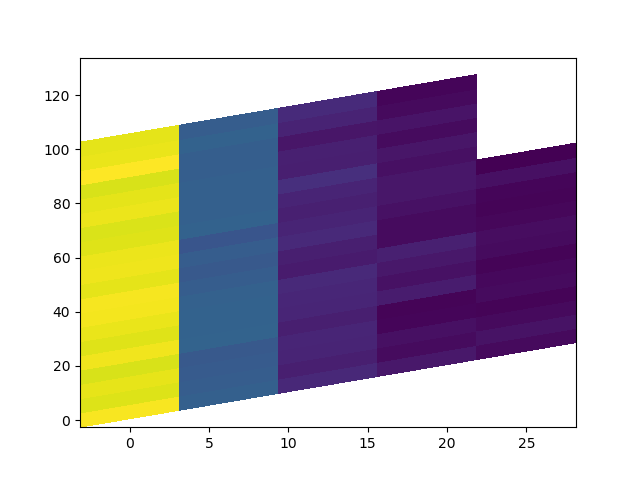

In [17]:
fig, ax = plt.subplots(1, 1)

ax.pcolormesh(x2dVertices, y2dVertices, z2d)

In [56]:
# %%time

# Nb points in the 1st dimension
xn = len(np.unique(x))

# Nb points in the 2nd dimension
xx = np.array([])
for i in np.unique(x):
    xx = np.append(xx, len(x[x==i]))
yn = int(xx.max())

# If interuption, we calculated the number of missing point and add them
if len(np.unique(xx)) != 1:

    p = np.full(int(xx.max() - xx.min()), np.nan)

    x = np.append(x, p)
    y = np.append(y, p)
    z = np.append(z, p)
print(x)
# We create 2D arrays for each dimension
x = x.reshape(xn, yn)
y = y.reshape(xn, yn)
z = z.reshape(xn, yn)
print(x)

# Once the shape is corrected, we sort the data
m = x[:,0].argsort()
x = x[m]
y = y[m]
z = z[m]
print(x)

# If the data has a rectangular shape (usual 2d measurement)
if len(np.unique(y[:,0])) == 1:

    # Take a slice of x
    xx = x[:,0]

    # Find a row of y containing only non nan data
    i = 0
    for i in y:
        if not np.any(np.isnan(i)):
            yy = i
            break
        i+=1

    zz = z
# If not (like a auto freq measurement )
else:

#     self.signals.setStatusBarMessage.emit('Irregular grid detexted, shapping 2d data', False)
    xx = x[:,0]
    print(xx)
    
    # Create a bigger array containing sorted data in the same bases
    # New y axis containing all the previous y axes
    yd = np.gradient(np.sort(y[0])).min()
    yy = np.arange(y[~np.isnan(y)].min(), y[~np.isnan(y)].max()+yd, yd)
    zz = np.full((len(xx), len(yy)), np.nan)
    
    
    for x_index in range(len(x)):
        for y_index in range(len(y.T)):
            zz[x_index,np.abs(yy-y[x_index, y_index]).argmin()] = z[x_index,y_index]

# If there is only one point in x or we artificialy create more
if len(xx)==1:
    print('aa')
    xx = np.array([xx*0.9, xx*1.1])
if len(yy)==1:
    yy = np.array([yy*0.9, yy*1.1])
    
print(xx)
dx = np.gradient(xx)/2.
xx = np.linspace(xx[0]-dx[0], xx[-1]+2.*dx[-1], len(xx))
dy = np.gradient(yy)/2.
yy = np.linspace(yy[0]-dy[0], yy[-1]+2.*dy[-1], len(yy))
    
xx.shape, yy.shape, zz.shape, xx, yy, zz

[[-60 -60 -60 ... -60 -60 -60]
 [-58 -58 -58 ... -58 -58 -58]
 [-56 -56 -56 ... -56 -56 -56]
 ...
 [-44 -44 -44 ... -44 -44 -44]
 [-42 -42 -42 ... -42 -42 -42]
 [-40 -40 -40 ... -40 -40 -40]]
[[-60 -60 -60 ... -60 -60 -60]
 [-58 -58 -58 ... -58 -58 -58]
 [-56 -56 -56 ... -56 -56 -56]
 ...
 [-44 -44 -44 ... -44 -44 -44]
 [-42 -42 -42 ... -42 -42 -42]
 [-40 -40 -40 ... -40 -40 -40]]
[[-60 -60 -60 ... -60 -60 -60]
 [-58 -58 -58 ... -58 -58 -58]
 [-56 -56 -56 ... -56 -56 -56]
 ...
 [-44 -44 -44 ... -44 -44 -44]
 [-42 -42 -42 ... -42 -42 -42]
 [-40 -40 -40 ... -40 -40 -40]]
[-60 -58 -56 -54 -52 -50 -48 -46 -44 -42 -40]
[-60 -58 -56 -54 -52 -50 -48 -46 -44 -42 -40]


((11,),
 (29649,),
 (11, 29649),
 array([-61. , -58.7, -56.4, -54.1, -51.8, -49.5, -47.2, -44.9, -42.6,
        -40.3, -38. ]),
 array([2.81315000e+09, 2.81325001e+09, 2.81335001e+09, ...,
        5.77789999e+09, 5.77799999e+09, 5.77810000e+09]),
 array([[        nan,         nan,         nan, ..., 31.91965484,
         31.49606586, 31.88967662],
        [ 9.04633687,  8.76250011,  8.26562371, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  8.87046513, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  8.12067877,  8.64192983, ...,         nan,
                 nan,         nan],
        [        nan,  8.16918671,  8.35274053, ...,         nan,
                 nan,         nan],
        [        nan,  8.32739538,  8.30972729, ...,         nan,
                 nan,         nan]]))

In [55]:
xx

array([-61., -59., -57., -55., -53., -51., -49., -47., -45., -43., -41.,
       -38.])

<IPython.core.display.Javascript object>


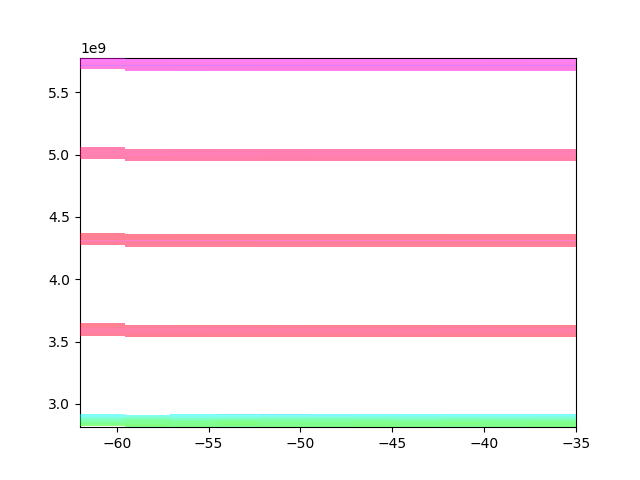

In [50]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

ax.imshow(zz.T,
            extent=[xx[0], xx[-1], yy[0], yy[-1]],
            origin='bottom',
            aspect='auto',
            alpha=0.5,
          
          cmap=plt.cm.hsv,
          
         zorder=1000)

# ax.set_xlim(-5, 30)
# ax.set_ylim(-10,130)

In [31]:
xx


array([-61., -59., -57., -55., -53., -51., -49., -47., -45., -43., -41.,
       -38., -38., -38., -38., -38., -38., -38., -38., -38., -38., -38.])

# Interpolation if too much data

In [18]:
from scipy.interpolate import griddata

In [19]:
x.shape, y.shape, z.shape

((100,), (100,), (100,))

In [66]:
xFlat = np.unique(x)
yFlat = np.unique(y)

xFlatnb = len(xFlat)
yFlatnb = len(yFlat)


X, Y = np.meshgrid(xFlat, yFlat)
pointsInterpolate = np.vstack([X.ravel(), Y.ravel()]).T

pointsRaw = np.vstack((x, y)).T

zInterpolate = griddata(points=pointsRaw,
                        values=z,
                        xi=pointsInterpolate,
                        method='linear')
zInterpolate = zInterpolate.reshape(yFlatnb, xFlatnb)

In [54]:
pointsRaw

array([[  0.        ,   0.        ],
       [  0.        ,   5.26315789],
       [  0.        ,  10.52631579],
       [  0.        ,  15.78947368],
       [  0.        ,  21.05263158],
       [  0.        ,  26.31578947],
       [  0.        ,  31.57894737],
       [  0.        ,  36.84210526],
       [  0.        ,  42.10526316],
       [  0.        ,  47.36842105],
       [  0.        ,  52.63157895],
       [  0.        ,  57.89473684],
       [  0.        ,  63.15789474],
       [  0.        ,  68.42105263],
       [  0.        ,  73.68421053],
       [  0.        ,  78.94736842],
       [  0.        ,  84.21052632],
       [  0.        ,  89.47368421],
       [  0.        ,  94.73684211],
       [  0.        , 100.        ],
       [  6.25      ,   6.25      ],
       [  6.25      ,  11.51315789],
       [  6.25      ,  16.77631579],
       [  6.25      ,  22.03947368],
       [  6.25      ,  27.30263158],
       [  6.25      ,  32.56578947],
       [  6.25      ,  37.82894737],
 

In [62]:
a = X.ravel()
b = Y.ravel()
b[a==-3.125]

griddata(points=pointsRaw,
         
                        values=z,
                        xi=(0, 110),
                        method='linear')

array(nan)

<IPython.core.display.Javascript object>


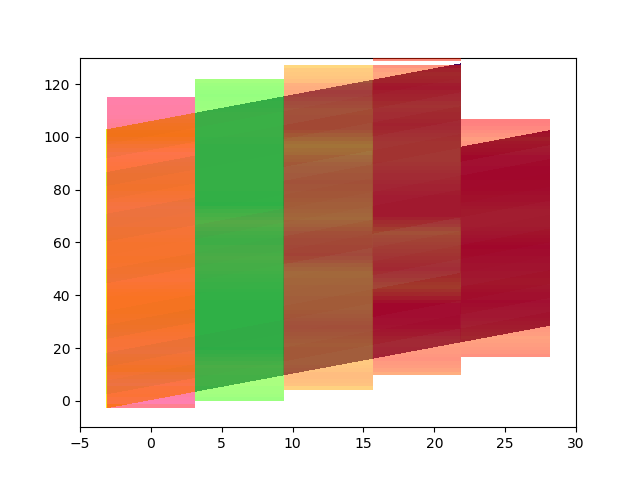

(-10, 130)

In [69]:
# points = np.vstack((x, y)).T

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

a = 8



ax.pcolormesh(x2dVertices, y2dVertices, z2d)
ax.imshow(zInterpolate,
#             extent=[x[0], x[-1], y[0], y[-1]],
          
            extent=[x2dVertices.min(), x2dVertices.max(), y2dVertices.min(), y2dVertices.max()],
            origin='bottom',
            aspect='auto',
            alpha=0.5,
          
          cmap=plt.cm.hsv,
          
         zorder=1000)

ax.set_xlim(-5, 30)
ax.set_ylim(-10,130)

In [65]:
x2dVertices.max()

28.125

In [ ]:
zz